 Project Title: Gun Data Investigation
 
 Introduction:
In this project, I will investigate trends in gun-related transactions across U.S. states using historical data. The dataset includes variables such as permits, handgun sales, long gun sales, and more.

 Key Questions to Explore:
Which U.S. states have the highest number of handgun sales?

What is the trend of gun sales over time?

Is there a relationship between permit count and total gun transactions?

Which states have the highest total gun transactions per month?

What percentage of data is missing and how does it affect the analysis?

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_excel(r"C:\Users\Waseem\OneDrive\Desktop\gun-data.xlsx")
df

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241


In [86]:
def plot_histogram(df, column_name):
  
    plt.figure(figsize=(10, 5))
    df[column_name].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

def missing_data_summary(df):
 
    missing = df.isnull().mean() * 100
    print("Missing Values (%):")
    print(missing[missing > 0].sort_values(ascending=False))


 User-Defined Functions:
 
To avoid code repetition and improve clarity, the following reusable functions were created. These will help visualize data distributions and understand missing values in the dataset.

In [5]:
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [66]:
df.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

Missing Values Analysis

To understand the quality of the dataset, I first checked the number of missing values in each column using `df.isnull().sum()`.

The total number of missing values in the dataset was 154,595, which is a significant amount.This analysis helped me identify which columns had too many missing entries and should be considered for removal in the cleaning step.


In [56]:
(df.isnull().mean() * 100).sort_values(ascending=False).head(10)


rentals_long_gun             93.392070
rentals_handgun              92.070485
permit_recheck               91.189427
returned_other               85.462555
returned_long_gun            82.819383
returned_handgun             82.378855
return_to_seller_other       81.938326
return_to_seller_handgun     80.176211
private_sale_other           77.973568
return_to_seller_long_gun    77.973568
dtype: float64

 Dropping Columns with Excessive Missing Data

Based on the missing value analysis, the following columns had over 70% missing data:

- rentals_long_gun
- rentals_handgun
- permit_recheck
- returned_other
- returned_long_gun
- returned_handgun
- return_to_seller_other
- return_to_seller_handgun
- return_to_seller_long_gun
- private_sale_other

Since these columns contain too many missing values and may distort the analysis, I decided to drop them from the dataset.


In [61]:
df_cleaned = df.drop([
    'rentals_long_gun',
    'rentals_handgun',
    'permit_recheck',
    'returned_other',
    'returned_long_gun',
    'returned_handgun',
    'return_to_seller_other',
    'return_to_seller_handgun',
    'private_sale_other',
    'return_to_seller_long_gun'
], axis=1)
df_cleaned

,month,state,permit,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,private_sale_handgun,private_sale_long_gun,totals
0,2017-09,Alabama,16717.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,2.0,1378.0,1262.0,1.0,9.0,16.0,32019
1,2017-09,Alaska,209.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,0.0,200.0,154.0,2.0,17.0,24.0,6303
2,2017-09,Arizona,5069.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,0.0,1474.0,748.0,3.0,38.0,12.0,28394
3,2017-09,Arkansas,2935.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,0.0,1296.0,1824.0,4.0,13.0,23.0,17747
4,2017-09,California,57839.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,535.0,397.0,5.0,0.0,0.0,123506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,1998-11,Virginia,0.0,14.0,2.0,NaN,8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,65.0,286.0,NaN,8,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,149.0,251.0,NaN,5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,25.0,214.0,NaN,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241


so here i removed any columns with 50% missing values


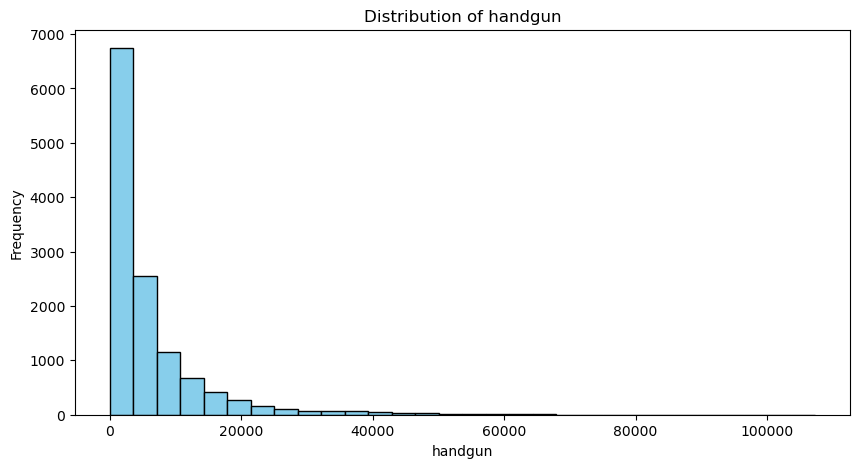

Missing Values (%):
private_sale_handgun     77.973568
private_sale_long_gun    77.973568
prepawn_other            59.030837
redemption_other         59.030837
other                    55.947137
prepawn_long_gun         15.578694
prepawn_handgun          15.562675
redemption_long_gun      15.546656
redemption_handgun       15.538646
permit                    0.192231
admin                     0.184221
handgun                   0.160192
long_gun                  0.152183
dtype: float64


In [90]:
plot_histogram(df_cleaned, 'handgun')
missing_data_summary(df_cleaned)



 Applying the Defined Functions on Cleaned Data

Now that the dataset has been cleaned, I used the custom-defined functions to explore its structure and distribution. This step helps confirm the impact of the cleaning process and identify further issues if any.


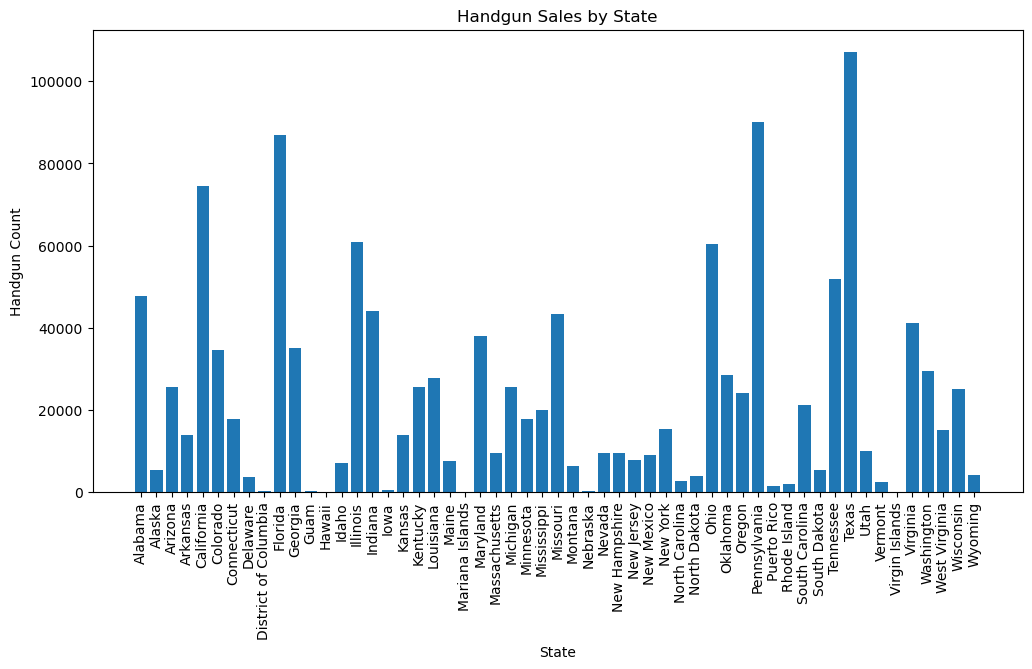

In [23]:
plt.figure(figsize=(12, 6))
plt.bar(df['state'], df['handgun'])
plt.xlabel('State')
plt.ylabel('Handgun Count')
plt.title('Handgun Sales by State')
plt.xticks(rotation=90)
plt.show()

The chart shows handgun sales across U.S. states.

- Texas, California, and Florida have the highest sales.
- Some states like Hawaii and D.C. have very low sales.
- Sales vary clearly between states.

Most columns are highly right-skewed, meaning:

Most values are small.
Some rows have very large values (outliers).

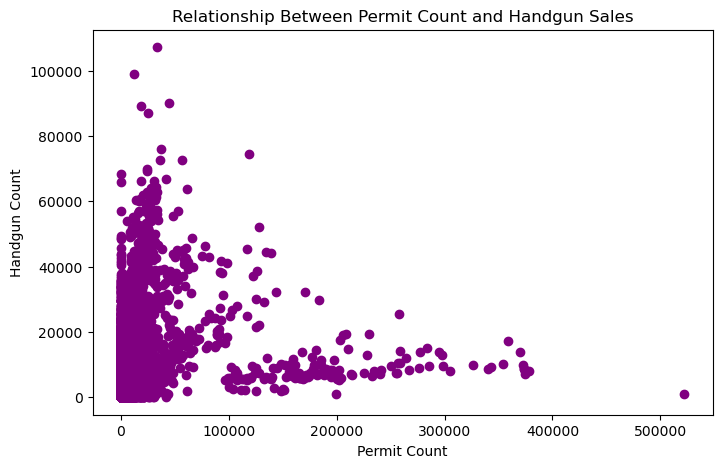

In [94]:
plt.figure(figsize=(8, 5))
plt.scatter(df_cleaned['permit'], df_cleaned['handgun'],color='purple')
plt.title('Relationship Between Permit Count and Handgun Sales')
plt.xlabel('Permit Count')
plt.ylabel('Handgun Count')
plt.grid(False)
plt.show()


 Interpretation of Scatter Plot: Permits vs. Handgun Sales

The scatter plot visualizes the relationship between the number of permits issued and handgun sales across states and time.

- There appears to be a **positive trend**: as the number of permits increases, handgun sales also tend to increase.
- However, the data also contains **a wide spread** and some **outliers** with very high permit counts but moderate handgun sales.
- This could suggest that while permits may be correlated with sales, other factors (e.g., state laws, population size, gun shows) might influence the results.
- Overall, this 2D analysis supports the idea that permit issuance is a meaningful indicator when studying handgun transactions.


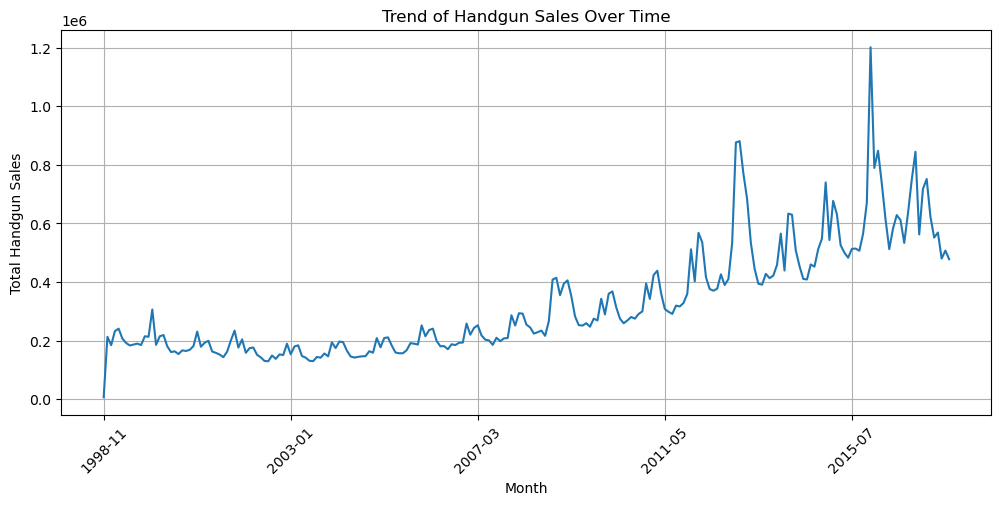

In [95]:
monthly_trend = df_cleaned.groupby('month')['handgun'].sum()

plt.figure(figsize=(12,5))
monthly_trend.plot()
plt.title('Trend of Handgun Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Handgun Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()




The line chart above illustrates the monthly trend in handgun sales across the U.S. from 1998 to 2017.

Key observations:
There is a **clear upward trend** in handgun sales over the years.
 Several **noticeable spikes** appear, especially around 2012–2016, possibly linked to political events, national incidents, or changes in gun laws.
 Although the overall direction is upward, the chart also shows significant **volatility**, with some months experiencing sharp increases.

This time-based analysis provides insight into how external factors may influence gun purchasing behavior on a national scale.


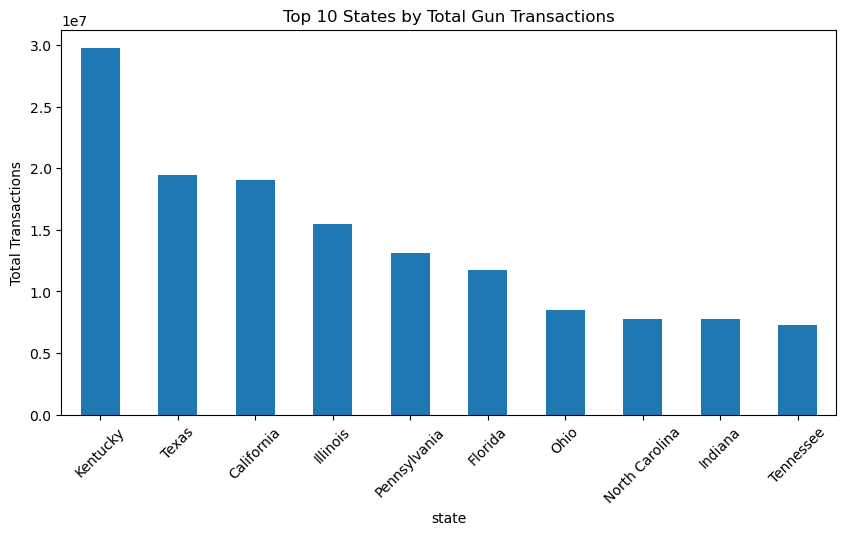

In [98]:
top_states = df_cleaned.groupby('state')['totals'].sum().sort_values(ascending=False).head(10)
top_states.plot(kind='bar', figsize=(10, 5), title='Top 10 States by Total Gun Transactions')
plt.ylabel('Total Transactions')
plt.xticks(rotation=45);


Top 10 States by Total Gun Transactions

This bar chart presents the top 10 U.S. states with the highest total number of gun transactions over the entire dataset period.

- **Kentucky** ranks first, which may be influenced by state-specific reporting or background check policies.
- **Texas** and **California** follow closely, which aligns with their large populations and known high firearm activity.
- This analysis helps identify where gun activity is most concentrated across the U.S., and highlights regional differences.

Grouping the data by state and using the `totals` column ensures a comprehensive view beyond individual gun types like handguns or long guns.


 Limitation

The dataset lacks contextual variables such as population size, crime rate, or demographic details, which limits the ability to fully explain variations in gun sales. Additionally, many columns had high proportions of missing values and had to be dropped, which may have reduced the depth of insights.
